# Otsu Global

### Chat GPT Threshhold calculation

##### Imports & Bild laden

In [1]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
import os


def find_image(root_folder, target_name):
    """
    Durchsucht root_folder (inkl. aller Unterordner) nach einer Datei mit dem Namen target_name.
    Gibt den vollständigen Pfad zurück, sobald die Datei gefunden wurde.
    Falls nicht gefunden, None zurückgeben.
    """
    for dirpath, dirnames, filenames in os.walk(root_folder):
        if target_name in filenames:
            return os.path.join(dirpath, target_name)
    return None

# 1) Wurzelordner (Data) festlegen und Datei­name, nach dem wir suchen
root = "Data"
filename = "t01.tif"

# 2) Pfad suchen
full_path = find_image(root, filename)
if full_path is None:
    raise FileNotFoundError(f"{filename} wurde nicht unter '{root}' gefunden.")
print(f"{filename} gefunden unter: {full_path}")

# 3) Bild laden
image = io.imread(full_path, as_gray=True)
print("Bildshape:", image.shape)

t01.tif gefunden unter: Data/N2DH-GOWT1/img/t01.tif
Bildshape: (1024, 1024)


##### Histogramm berechnen

Hist sum: 1048576
Amount for each pixel value: [604848      0 281368      0      0  83218      0  24324      0      0
  10572      0      0   6865      0   5571      0      0   4629      0
   3930      0      0   3495      0      0   3048      0   2722      0
      0   2542      0      0   2172      0   1929      1      0   1509
      0   1307      0      0   1034      0      0    862      0    656
      0      0    521      0      0    352      0    289      0      0
    208      0    136      0      0    103      0      0     60      0
     58      0      0     45      0      0     35      0     27      0
      0     28      0     26      0      0     16      0      0      7
      0     10      0      0     10      0      0      8      0     13
      0      0      4      0      5      0      0      2      0      0
      4      0      0      0      0      2      0      0      2      0
      0      0      0      0      0      0      0      0      0      0
      0      1      0      0  

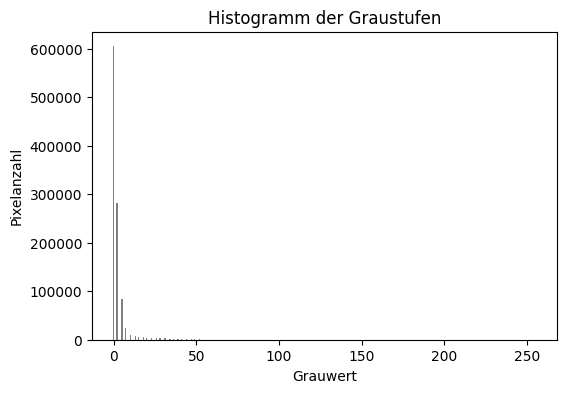

In [7]:
# Histogramm
hist = np.bincount(image.ravel(), minlength=256)
total = hist.sum()
print("Hist sum:", total)
print("Amount for each pixel value:", hist)

plt.figure(figsize=(6,4))
plt.bar(range(256), hist, color='gray')
plt.title("Histogramm der Graustufen")
plt.xlabel("Grauwert")
plt.ylabel("Pixelanzahl")
plt.show()

##### Otsu manuell berechnen

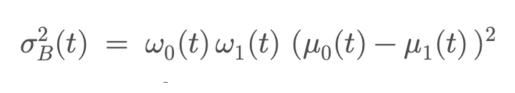

In [8]:
Otsu_Formel = io.imread("archiv/Bilder Extra/Otsu_Formel.png")
plt.imshow(Otsu_Formel)
plt.axis('off')
plt.show()

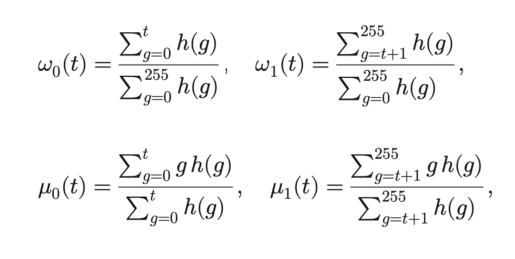

In [9]:
Otsu_Formel_Variablen = io.imread("archiv/Bilder Extra/Otsu_Formel_Variablen.png", as_gray=True)
plt.imshow(Otsu_Formel_Variablen, cmap= 'gray')
plt.axis('off')
plt.show()

In [12]:
# Präcompute kumulierte Gewichte und Mittel
omega0 = np.cumsum(hist) / total
mu0_cum = np.cumsum(np.arange(256) * hist)

max_var = 0
best_t = 0

for t in range(256):
    w0 = omega0[t]
    w1 = 1 - w0
    if w0 == 0 or w1 == 0:
        continue
    mu0 = mu0_cum[t]           / (w0 * total)
    mu1 = (mu0_cum[255] - mu0_cum[t]) / (w1 * total)
    varB = w0 * w1 * (mu0 - mu1)**2
    if varB > max_var:
        max_var = varB
        best_t  = t

print("Otsu_Schwellenwert:", best_t)

Otsu_Schwellenwert: 15


##### Ergebnisse Anzeigen

Maske [[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
O,1 Maske [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


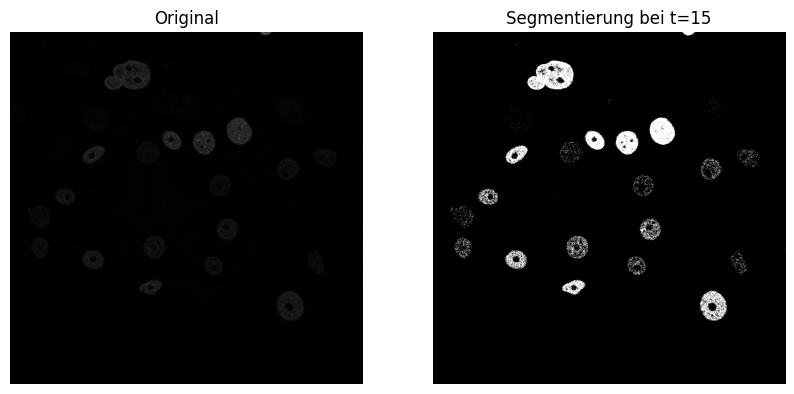

In [14]:
mask = image > best_t
print("Maske", mask)
otsu_gt = mask.astype(int)
print("O,1 Maske", otsu_gt)

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10,5))
ax0.imshow(image, cmap="gray", vmin=0, vmax=255)
ax0.set_title("Original")
ax0.axis("off")

ax1.imshow(mask, cmap="gray")
ax1.set_title(f"Segmentierung bei t={best_t}")
ax1.axis("off")

plt.show()